# Project 1

## Step 1: Open the `sat_scores.csv` file. Investigate the data, and answer the questions below.


##### 1. What does the data describe?

The data looks at SAT scores by state, and the percentage of students that take the SAT and their respective scores

##### 2. Does the data look complete? Are there any obvious issues with the observations?

It seems to be missing the reading category, so it is not fully complete. All 50 states are present though

In [19]:
# Numeric and statistics packages:
import numpy as np
import scipy.stats as stats

# Pandas handles dataset loading and manipulation:
import pandas as pd

# import the plotting functions:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

import csv
# Initialize plotly notebook mode:
plotly.offline.init_notebook_mode()

# Setup matplotlib to display in notebook:
%matplotlib inline

##### 3. Create a data dictionary for the dataset.

In [20]:
with open('../assets/sat_scores.csv', 'rU') as f:
    data = []
    rate = []
    verbal = []
    math = []
    states = []
    reader = csv.reader(f)
    for row in reader:
        states.append(row[0])
        data.append(row[1:])
        math.append(row[3])
        verbal.append(row[2])
        rate.append(row[1])
f.close()
readerX = csv.reader(open('../assets/sat_scores.csv'))
dictyx = {}
#populating dictionary
for row in readerX:
    key = row[0]
    dictyx[key] = row[1:]
print dictyx
sat_scores = pd.read_csv('../assets/sat_scores.csv')
#sat_scores

{'WA': ['53', '527', '527'], 'DE': ['67', '501', '499'], 'DC': ['56', '482', '474'], 'WI': ['6', '584', '596'], 'WV': ['18', '527', '512'], 'State': ['Rate', 'Verbal', 'Math'], 'HI': ['52', '485', '515'], 'FL': ['54', '498', '499'], 'WY': ['11', '547', '545'], 'NH': ['72', '520', '516'], 'NJ': ['81', '499', '513'], 'NM': ['13', '551', '542'], 'TX': ['53', '493', '499'], 'LA': ['7', '564', '562'], 'NC': ['65', '493', '499'], 'ND': ['4', '592', '599'], 'NE': ['8', '562', '568'], 'TN': ['13', '562', '553'], 'NY': ['77', '495', '505'], 'PA': ['71', '500', '499'], 'RI': ['71', '501', '499'], 'NV': ['33', '509', '515'], 'VA': ['68', '510', '501'], 'CO': ['31', '539', '542'], 'AK': ['51', '514', '510'], 'AL': ['9', '559', '554'], 'AR': ['6', '562', '550'], 'VT': ['69', '511', '506'], 'IL': ['12', '576', '589'], 'GA': ['63', '491', '489'], 'IN': ['60', '499', '501'], 'IA': ['5', '593', '603'], 'OK': ['8', '567', '561'], 'AZ': ['34', '523', '525'], 'CA': ['51', '498', '517'], 'ID': ['17', '543'

In [21]:
column_headers = []

#getting column headers
for keys in dictyx.items():
    #print keys
    if keys[0] == "State":
        column_headers.append(keys[0])
        for value in keys[1]:
            column_headers.append(value)

pureData = []
for keys,values in dictyx.items():
    if keys == "State":
        continue
    else:
        pureData.append(values)
        


pureDataHeader = column_headers[1:]
#pureData

## Step 2: Load the data.

##### 4. Load the data into a list of lists

In [22]:
listy = []
for key,value in dictyx.items():
    #list of lists
    keyValue = [key] + value
    #remove labels from data
    if key == "State":
        continue
    else:
        listy.append(keyValue)

#convert to numpy array
listyx = np.array(listy)

##### 5. Print the data

In [23]:
listyx

array([['WA', '53', '527', '527'],
       ['DE', '67', '501', '499'],
       ['DC', '56', '482', '474'],
       ['WI', '6', '584', '596'],
       ['WV', '18', '527', '512'],
       ['HI', '52', '485', '515'],
       ['FL', '54', '498', '499'],
       ['WY', '11', '547', '545'],
       ['NH', '72', '520', '516'],
       ['NJ', '81', '499', '513'],
       ['NM', '13', '551', '542'],
       ['TX', '53', '493', '499'],
       ['LA', '7', '564', '562'],
       ['NC', '65', '493', '499'],
       ['ND', '4', '592', '599'],
       ['NE', '8', '562', '568'],
       ['TN', '13', '562', '553'],
       ['NY', '77', '495', '505'],
       ['PA', '71', '500', '499'],
       ['RI', '71', '501', '499'],
       ['NV', '33', '509', '515'],
       ['VA', '68', '510', '501'],
       ['CO', '31', '539', '542'],
       ['AK', '51', '514', '510'],
       ['AL', '9', '559', '554'],
       ['AR', '6', '562', '550'],
       ['VT', '69', '511', '506'],
       ['IL', '12', '576', '589'],
       ['GA', '63', '491',

##### 6. Extract a list of the labels from the data, and remove them from the data.

In [24]:
#combined this into part 4

print column_headers
sat_scores.columns.values

['State', 'Rate', 'Verbal', 'Math']


array(['State', 'Rate', 'Verbal', 'Math'], dtype=object)

##### 7. Create a list of State names extracted from the data. (Hint: use the list of labels to index on the State column)

In [25]:
state_names = []

for values in listyx:
    state_names.append(values[0])

#remove unnecessary stuff
#unsure if all should stay or go, so in for now

#state_names.remove("All")

print state_names



['WA', 'DE', 'DC', 'WI', 'WV', 'HI', 'FL', 'WY', 'NH', 'NJ', 'NM', 'TX', 'LA', 'NC', 'ND', 'NE', 'TN', 'NY', 'PA', 'RI', 'NV', 'VA', 'CO', 'AK', 'AL', 'AR', 'VT', 'IL', 'GA', 'IN', 'IA', 'OK', 'AZ', 'CA', 'ID', 'CT', 'ME', 'MD', 'All', 'MA', 'OH', 'UT', 'MO', 'MN', 'MI', 'KS', 'MT', 'MS', 'SC', 'KY', 'OR', 'SD']


##### 8. Print the types of each column

In [26]:
#numpy array
for column in listyx:
    print ''
    print type(column)
    print column
    for values in column:
        print type(values)


<type 'numpy.ndarray'>
['WA' '53' '527' '527']
<type 'numpy.string_'>
<type 'numpy.string_'>
<type 'numpy.string_'>
<type 'numpy.string_'>

<type 'numpy.ndarray'>
['DE' '67' '501' '499']
<type 'numpy.string_'>
<type 'numpy.string_'>
<type 'numpy.string_'>
<type 'numpy.string_'>

<type 'numpy.ndarray'>
['DC' '56' '482' '474']
<type 'numpy.string_'>
<type 'numpy.string_'>
<type 'numpy.string_'>
<type 'numpy.string_'>

<type 'numpy.ndarray'>
['WI' '6' '584' '596']
<type 'numpy.string_'>
<type 'numpy.string_'>
<type 'numpy.string_'>
<type 'numpy.string_'>

<type 'numpy.ndarray'>
['WV' '18' '527' '512']
<type 'numpy.string_'>
<type 'numpy.string_'>
<type 'numpy.string_'>
<type 'numpy.string_'>

<type 'numpy.ndarray'>
['HI' '52' '485' '515']
<type 'numpy.string_'>
<type 'numpy.string_'>
<type 'numpy.string_'>
<type 'numpy.string_'>

<type 'numpy.ndarray'>
['FL' '54' '498' '499']
<type 'numpy.string_'>
<type 'numpy.string_'>
<type 'numpy.string_'>
<type 'numpy.string_'>

<type 'numpy.ndarray

##### 9. Do any types need to be reassigned? If so, go ahead and do it.

In [27]:
intList = []
for column in pureData:
    #print column[1:]
    for values in column:
        #print values
        values = int(values)
        intList.append(int(values))
#    intList.append(column)
    #print type(values)
#        listy.append(int(values))
for values in intList:
    print ''
    print type(values)
    print values


<type 'int'>
53

<type 'int'>
527

<type 'int'>
527

<type 'int'>
67

<type 'int'>
501

<type 'int'>
499

<type 'int'>
56

<type 'int'>
482

<type 'int'>
474

<type 'int'>
6

<type 'int'>
584

<type 'int'>
596

<type 'int'>
18

<type 'int'>
527

<type 'int'>
512

<type 'int'>
52

<type 'int'>
485

<type 'int'>
515

<type 'int'>
54

<type 'int'>
498

<type 'int'>
499

<type 'int'>
11

<type 'int'>
547

<type 'int'>
545

<type 'int'>
72

<type 'int'>
520

<type 'int'>
516

<type 'int'>
81

<type 'int'>
499

<type 'int'>
513

<type 'int'>
13

<type 'int'>
551

<type 'int'>
542

<type 'int'>
53

<type 'int'>
493

<type 'int'>
499

<type 'int'>
7

<type 'int'>
564

<type 'int'>
562

<type 'int'>
65

<type 'int'>
493

<type 'int'>
499

<type 'int'>
4

<type 'int'>
592

<type 'int'>
599

<type 'int'>
8

<type 'int'>
562

<type 'int'>
568

<type 'int'>
13

<type 'int'>
562

<type 'int'>
553

<type 'int'>
77

<type 'int'>
495

<type 'int'>
505

<type 'int'>
71

<type 'int'>
500

<type 'int'>
4

##### 10. Create a dictionary for each column mapping the State to its respective value for that column. 

In [28]:
dictyx

{'AK': ['51', '514', '510'],
 'AL': ['9', '559', '554'],
 'AR': ['6', '562', '550'],
 'AZ': ['34', '523', '525'],
 'All': ['45', '506', '514'],
 'CA': ['51', '498', '517'],
 'CO': ['31', '539', '542'],
 'CT': ['82', '509', '510'],
 'DC': ['56', '482', '474'],
 'DE': ['67', '501', '499'],
 'FL': ['54', '498', '499'],
 'GA': ['63', '491', '489'],
 'HI': ['52', '485', '515'],
 'IA': ['5', '593', '603'],
 'ID': ['17', '543', '542'],
 'IL': ['12', '576', '589'],
 'IN': ['60', '499', '501'],
 'KS': ['9', '577', '580'],
 'KY': ['12', '550', '550'],
 'LA': ['7', '564', '562'],
 'MA': ['79', '511', '515'],
 'MD': ['65', '508', '510'],
 'ME': ['69', '506', '500'],
 'MI': ['11', '561', '572'],
 'MN': ['9', '580', '589'],
 'MO': ['8', '577', '577'],
 'MS': ['4', '566', '551'],
 'MT': ['23', '539', '539'],
 'NC': ['65', '493', '499'],
 'ND': ['4', '592', '599'],
 'NE': ['8', '562', '568'],
 'NH': ['72', '520', '516'],
 'NJ': ['81', '499', '513'],
 'NM': ['13', '551', '542'],
 'NV': ['33', '509', '5

##### 11. Create a dictionary with the values for each of the numeric columns

In [29]:
dictByCategory = {}
dataSet = []
#set of just data
for values in listy:
    if values[0] != "State":
        dataSet.append(values[1:])
#for column in column_headers:
#    dictByCategory[column] = 1
#    for values in listy:
#        if values[0] != "State":
#            print values[1:]
#        if column.index() == values.index():
#            dictyByCategory[column].append(values)

dictByCategory = {i: [int(j[column_headers.index(i)-1]) for j in dataSet] for i in column_headers}    
print dictByCategory
#dataSet

{'Math': [527, 499, 474, 596, 512, 515, 499, 545, 516, 513, 542, 499, 562, 499, 599, 568, 553, 505, 499, 499, 515, 501, 542, 510, 554, 550, 506, 589, 489, 501, 603, 561, 525, 517, 542, 510, 500, 510, 514, 515, 439, 570, 577, 589, 572, 580, 539, 551, 488, 550, 526, 582], 'State': [527, 499, 474, 596, 512, 515, 499, 545, 516, 513, 542, 499, 562, 499, 599, 568, 553, 505, 499, 499, 515, 501, 542, 510, 554, 550, 506, 589, 489, 501, 603, 561, 525, 517, 542, 510, 500, 510, 514, 515, 439, 570, 577, 589, 572, 580, 539, 551, 488, 550, 526, 582], 'Rate': [53, 67, 56, 6, 18, 52, 54, 11, 72, 81, 13, 53, 7, 65, 4, 8, 13, 77, 71, 71, 33, 68, 31, 51, 9, 6, 69, 12, 63, 60, 5, 8, 34, 51, 17, 82, 69, 65, 45, 79, 26, 5, 8, 9, 11, 9, 23, 4, 57, 12, 55, 4], 'Verbal': [527, 501, 482, 584, 527, 485, 498, 547, 520, 499, 551, 493, 564, 493, 592, 562, 562, 495, 500, 501, 509, 510, 539, 514, 559, 562, 511, 576, 491, 499, 593, 567, 523, 498, 543, 509, 506, 508, 506, 511, 534, 575, 577, 580, 561, 577, 539, 566, 486

## Step 3: Describe the data

##### 12. Print the min and max of each column

In [30]:
#del dictByCategory["State"]
#print max(intList)
#print min(intList)
#print intList
for key, value in dictByCategory.items():
    if key == "Rate":
        rateMax = max(value)
        rateMin = min(value)
    if key == "Verbal":
        verbalMax = max(value)
        verbalMin = min(value)
    if key == "Math":
        mathMax = max(value)
        mathMin = min(value)
            
print "Rate max: %i, Rate min: %i" % (rateMax, rateMin)
print "Rate max: %i, Rate min: %i" % (verbalMax, verbalMin)
print "Rate max: %i, Rate min: %i" % (mathMax, mathMin)

Rate max: 82, Rate min: 4
Rate max: 593, Rate min: 482
Rate max: 603, Rate min: 439


##### 13. Write a function using only list comprehensions, no loops, to compute Standard Deviation. Print the Standard Deviation of each numeric column.

In [54]:
#def std_dev(listy):
#    sumOriginal = 0
#    sumOrigMinusAvg = 0
#    sqOrigMinusAvg = []
#    for value in listy:
#        sumOriginal += value
#    average = float(sumOriginal) / float(len(listy))
#    for value in listy:
#        extra = 0
#        extra = (value - average) ** 2
#        sqOrigMinusAvg.append(extra)
#    for value in sqOrigMinusAvg:
#        sumOrigMinusAvg += value
#    variance = float(sumOrigMinusAvg) / float(len(sqOrigMinusAvg))
#    std_deviation = math.sqrt(variance)
#    return std_deviation
from math import sqrt
def std_dev(listy):
    average = float(sum(listy)) / float(len(listy))
    variance = sum([(i-average)**2 for i in listy]) / len(listy)
    return sqrt(variance)
print std_dev(rate_scores)
print std_dev(math_scores)
print std_dev(verbal_scores)

27.0379964945
35.6669961643
32.9150949616


## Step 4: Visualize the data

##### 14. Using MatPlotLib and PyPlot, plot the distribution of the Rate using histograms.

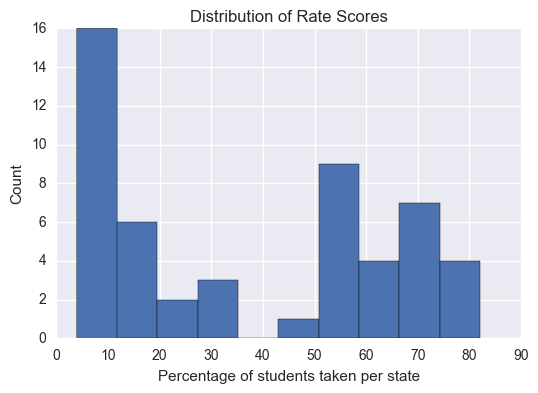

In [35]:
plt.hist(rate_scores)
plt.title("Distribution of Rate Scores")
plt.xlabel("Percentage of students taken per state")
plt.ylabel("Count")

In [34]:

#sns.pairplot(sat_scores)

math_scores = sat_scores.Math.values
verbal_scores = sat_scores.Verbal.values
rate_scores = sat_scores.Rate.values
states = sat_scores["State"]

#plt.scatter(rate_scores, states, c=[0/255.,100/255.,255/255.], s=80,alpha=0.5)

In [36]:
#print sat_scores.columns.values
#print sat_scores["State"]


##### 15. Plot the Math distribution

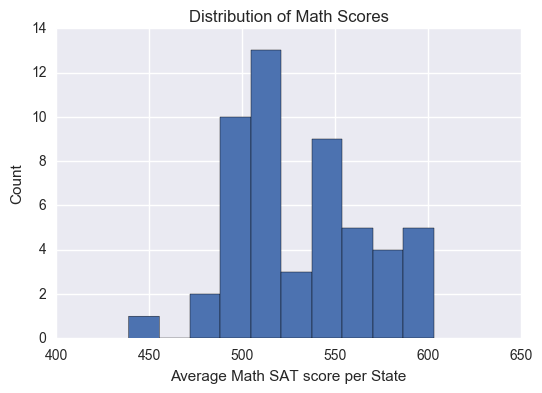

In [37]:
plt.hist(math_scores)
plt.title("Distribution of Math Scores")
plt.xlabel("Average Math SAT score per State")
plt.ylabel("Count")

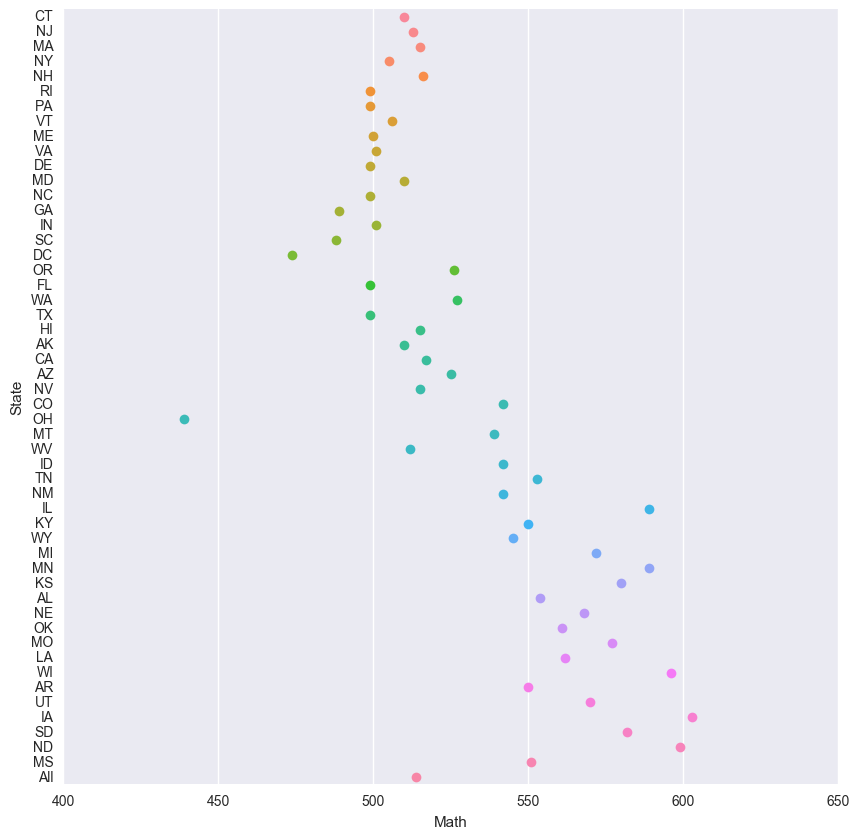

In [38]:
plt.figure(figsize=(10,10))
ay = sns.swarmplot(x=sat_scores["Math"], y=sat_scores["State"], size=7)

##### 16. Plot the Verbal distribution

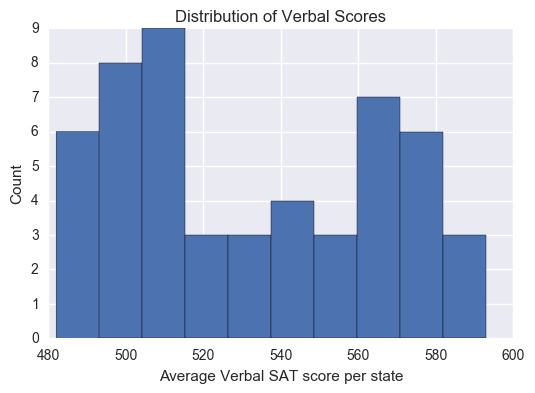

In [39]:
plt.hist(verbal_scores)
plt.title("Distribution of Verbal Scores")
plt.xlabel("Average Verbal SAT score per state")
plt.ylabel("Count")

##### 17. What is the typical assumption for data distribution?

68% of all the data falls within 1 std deviation, 95% within 2, and 99.7% within 3.

##### 18. Does that distribution hold true for our data?

No it does not

##### 19. Plot some scatterplots. **BONUS**: Use a PyPlot `figure` to present multiple plots at once.

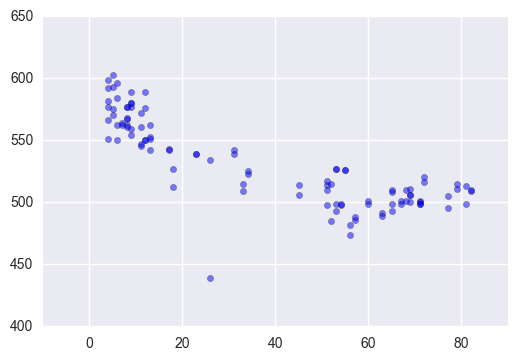

In [50]:
plt.scatter(rate_scores, verbal_scores, alpha=0.5)
plt.scatter(rate_scores, math_scores, alpha=0.5)
plt.show()

##### 20. Are there any interesting relationships to note?

Seems like the less the amount of people that took the test in that state, the higher the average score would be. This might be because less people overall are taking it, maybe there are more resources dedicated per student in that state.

##### 21. Create box plots for each variable. 

{'boxes': [<matplotlib.lines.Line2D at 0x11c578790>],
 'caps': [<matplotlib.lines.Line2D at 0x11c5866d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11c5909d0>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11c590390>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11c578990>,
  <matplotlib.lines.Line2D at 0x11c586090>]}

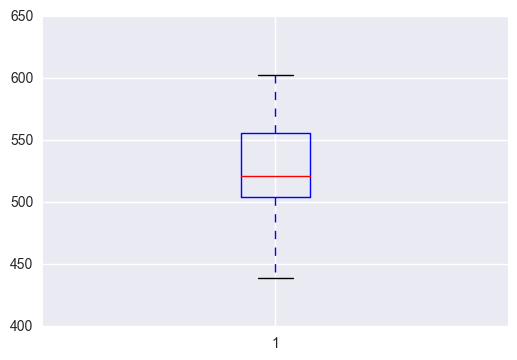

In [41]:
plt.boxplot(math_scores)

{'boxes': [<matplotlib.lines.Line2D at 0x11c807910>],
 'caps': [<matplotlib.lines.Line2D at 0x11c814850>,
 'fliers': [<matplotlib.lines.Line2D at 0x11c81eb50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11c81e510>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11c807b10>,
  <matplotlib.lines.Line2D at 0x11c814210>]}

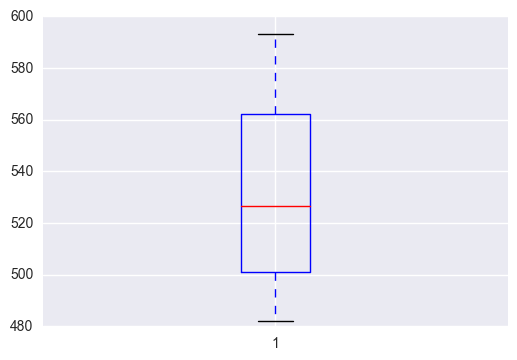

In [42]:
plt.boxplot(verbal_scores)

{'boxes': [<matplotlib.lines.Line2D at 0x11c9823d0>],
 'caps': [<matplotlib.lines.Line2D at 0x11c990310>,
 'fliers': [<matplotlib.lines.Line2D at 0x11c99b610>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11c990f90>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11c9825d0>,
  <matplotlib.lines.Line2D at 0x11c982c90>]}

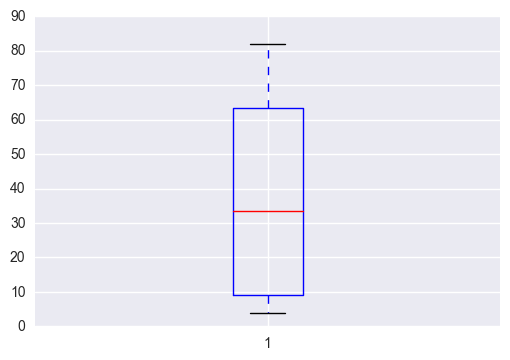

In [43]:
plt.boxplot(rate_scores)

##### BONUS: Using Tableau, create a heat map for each variable using a map of the US. 

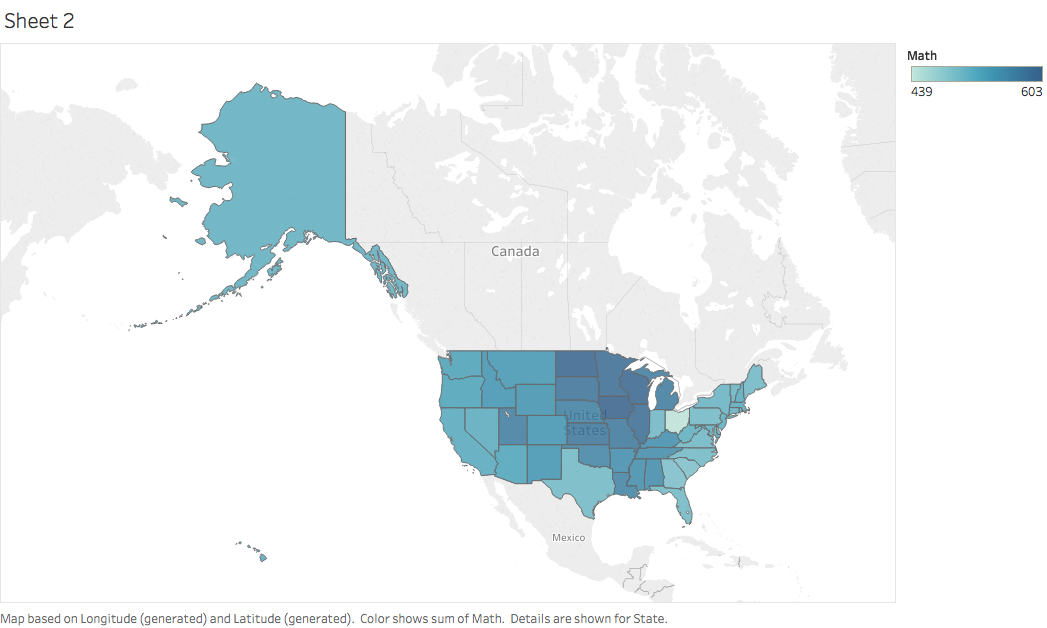

In [51]:
from IPython.display import Image
#from IPython.core.display import HTML 
Image("../assets/math heat map.png")

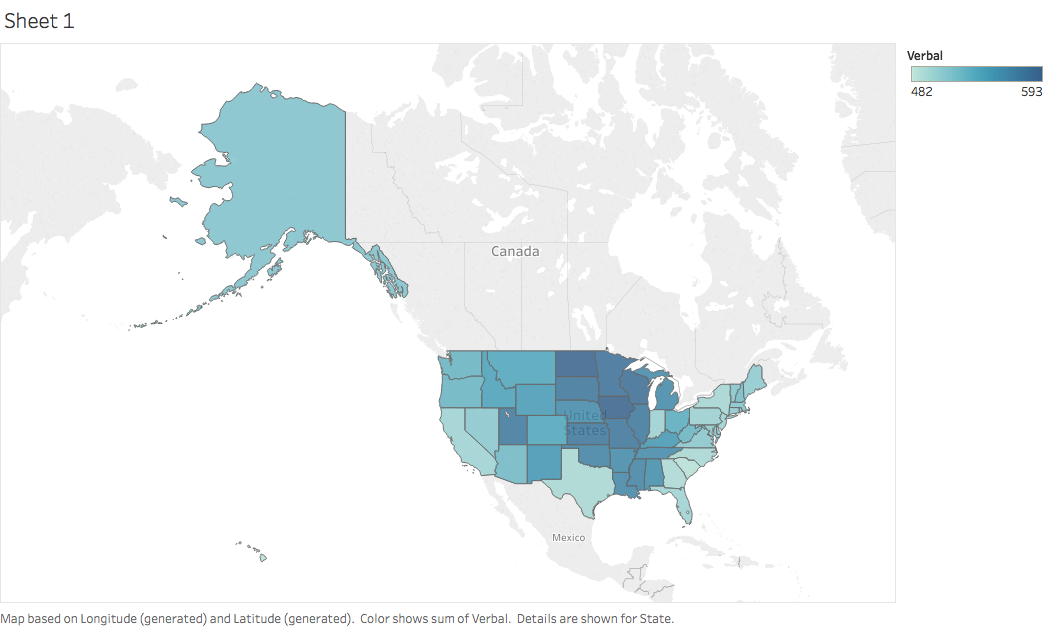

In [45]:
Image("../assets/verbal heat map.png")

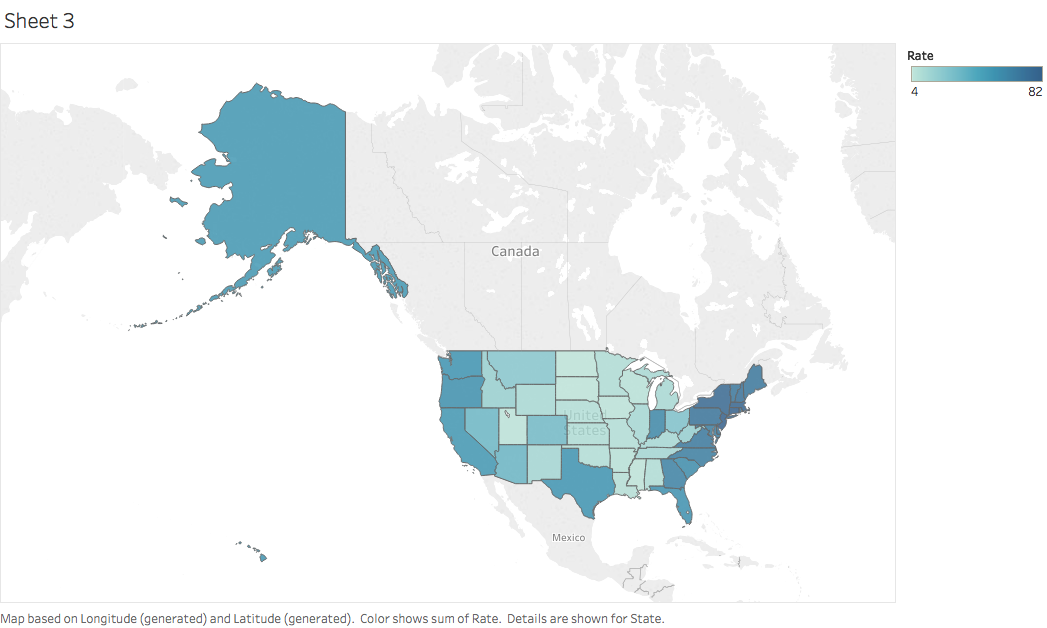

In [46]:
Image("../assets/rate heat map.png")

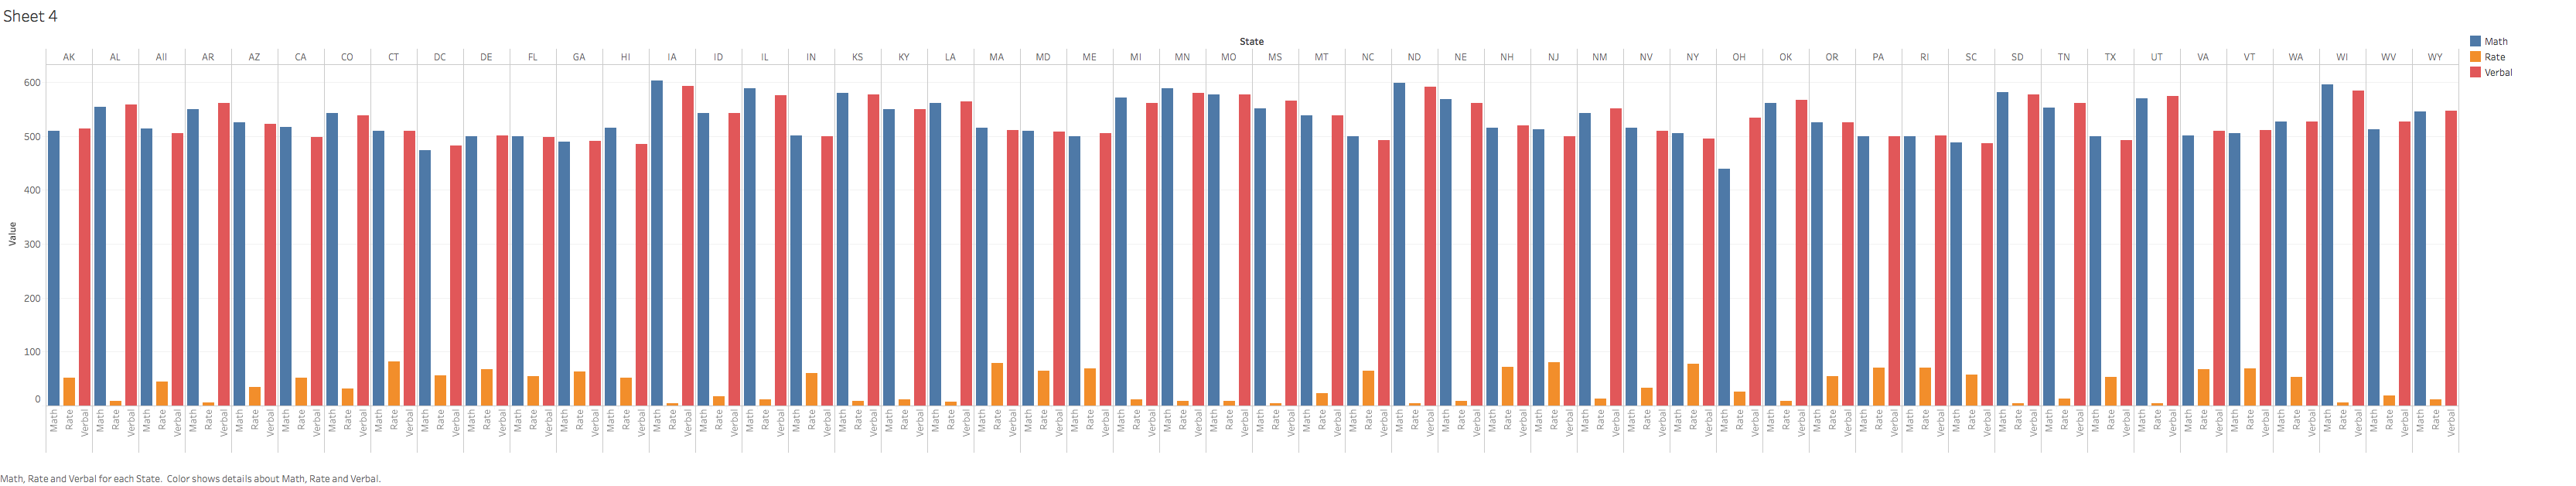

In [47]:
Image("../assets/side by side.png")

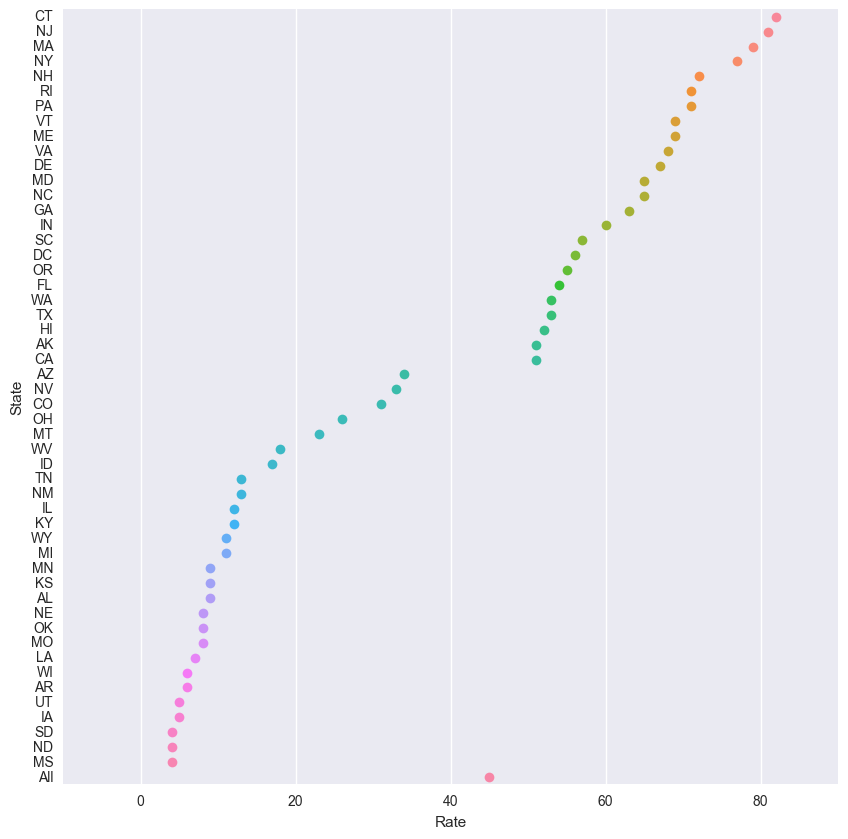

In [48]:
plt.figure(figsize=(10,10))
aa = sns.swarmplot(x=sat_scores["Rate"], y=sat_scores["State"], size=7)

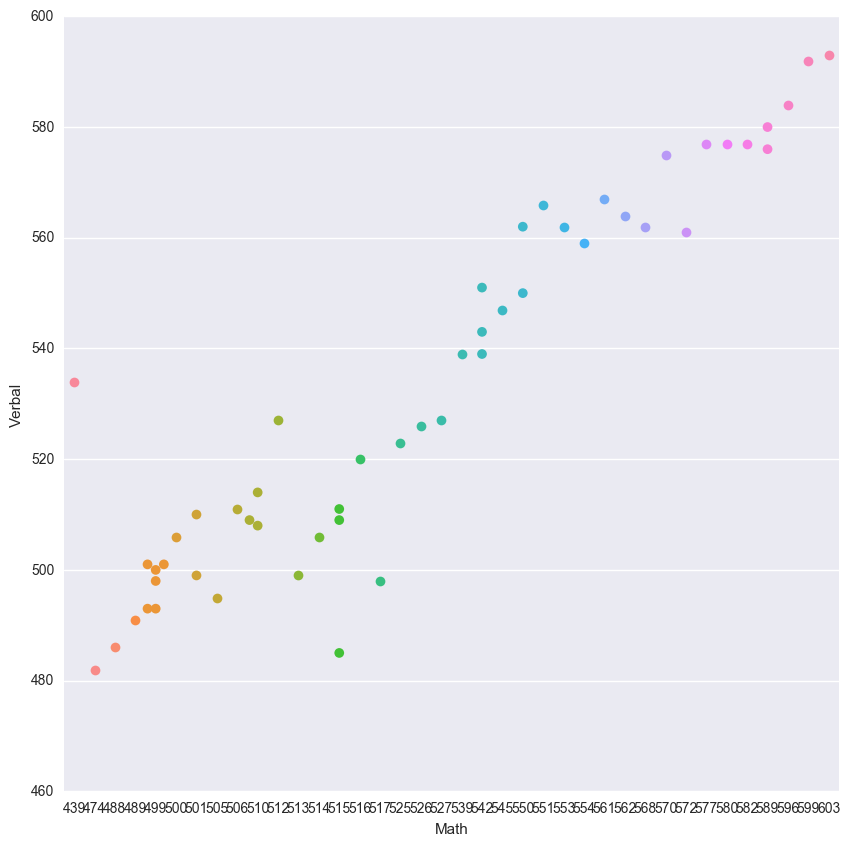

In [49]:
plt.figure(figsize=(10,10))
aa = sns.swarmplot(x=sat_scores["Math"], y=sat_scores["Verbal"], size=7)

States that score high tend to score high on both tests, and the same with low scoring states